In [1]:
# importing libaries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.width", None)

#import dataset
df = pd.read_csv('cleaned_data.csv')

df.head()

,Unnamed: 0,Asset,State,Post Code,Address,Date,Time,Count Last Year,Count This Year,Count Var,Date.1,Minimum temperature (?C),Maximum temperature (?C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Count
0,0,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",2022-01-01,00:00:00,0.0,0.0,0.0,January,17.3,23.7,0.0,SSW,50.0,17:38:00,55.0,10,24.0,1012.8,67.0,12,41.0,1010.9,0.0
1,1,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",2022-01-01,01:00:00,0.0,0.0,0.0,January,17.3,23.7,0.0,SSW,50.0,17:38:00,55.0,10,24.0,1012.8,67.0,12,41.0,1010.9,0.0
2,2,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",2022-01-01,02:00:00,0.0,0.0,0.0,January,17.3,23.7,0.0,SSW,50.0,17:38:00,55.0,10,24.0,1012.8,67.0,12,41.0,1010.9,0.0
3,3,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",2022-01-01,03:00:00,0.0,0.0,0.0,January,17.3,23.7,0.0,SSW,50.0,17:38:00,55.0,10,24.0,1012.8,67.0,12,41.0,1010.9,0.0
4,4,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171",2022-01-01,04:00:00,12.0,9.0,-3.0,January,17.3,23.7,0.0,SSW,50.0,17:38:00,55.0,10,24.0,1012.8,67.0,12,41.0,1010.9,12.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104688 entries, 0 to 104687
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         104688 non-null  int64  
 1   Asset                              104688 non-null  object 
 2   State                              104688 non-null  object 
 3   Post Code                          104688 non-null  int64  
 4   Address                            104688 non-null  object 
 5   Date                               104688 non-null  object 
 6   Time                               104688 non-null  object 
 7   Count Last Year                    104688 non-null  float64
 8   Count This Year                    104688 non-null  float64
 9   Count Var                          104688 non-null  float64
 10  Date.1                             104688 non-null  object 
 11  Minimum temperature (?C)           1046

In [4]:
df['Direction of maximum wind gust '].value_counts()

ESE    23808
E       9096
SSW     8664
SW      7920
SE      7848
NNE     5568
WSW     5496
SSE     5424
S       5352
ENE     5280
NE      5136
N       4584
W       4032
WNW     2544
NNW     2040
NW      1896
Name: Direction of maximum wind gust , dtype: int64

In [6]:
# converting to numerical var
df['Direction of maximum wind gust '] =df['Direction of maximum wind gust '].astype('category').cat.codes

In [8]:
df.columns

Index(['Unnamed: 0', 'Asset', 'State', 'Post Code', 'Address', 'Date', 'Time',
       'Count Last Year', 'Count This Year', 'Count Var', 'Date.1',
       'Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)', 'Count'],
      dtype='object')

In [9]:
feature_cols = np.array(['Minimum temperature (?C)', 'Maximum temperature (?C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       '9am relative humidity (%)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm relative humidity (%)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)', 'Count'])

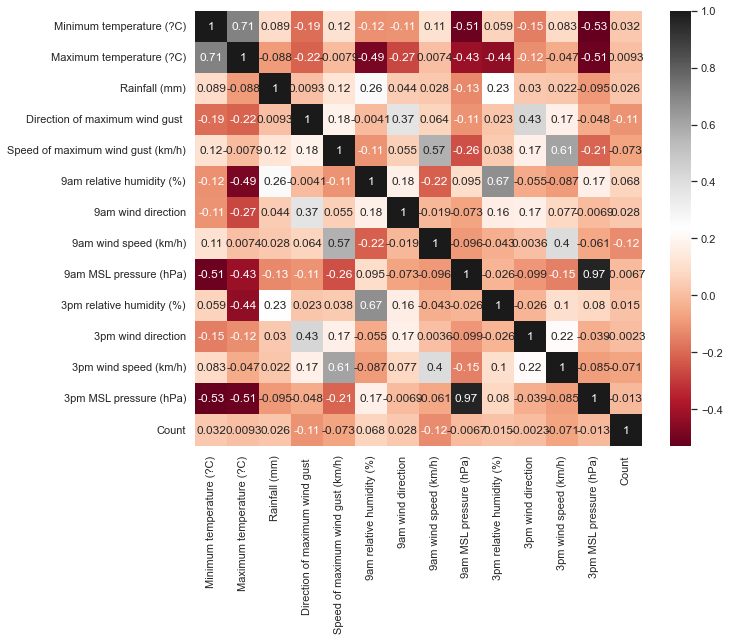

In [10]:
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(df[feature_cols].corr(), cmap="RdGy", annot=True)
  
# displaying heatmap
plt.show()

In [11]:
X = df[feature_cols]
y = df['Count']

#  splitting the data into 70% train and 30% test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(73281, 14)
(73281,)
(31407, 14)
(31407,)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# #apply these models in the train dataset first and comparing the perfomances between algorithms
# models = {
#     LogisticRegression(): "Logistic Regression",
#     Lasso(): "Lasso",
#     Ridge(): "Ridge",
#     ElasticNet(): "ElasticNet",
#     RandomForestRegressor(): "Random Forest"
# }

# for model in models.keys():
#     model.fit(X_train_scaled, y_train)

In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import mean_squared_error

# # Tesing model and calculaing the score of each model
# for model, model_name in models.items():
#     print(model_name + " accuracy score"  + ": {:.3f}".format(model.score(X_train_scaled, y_train)))


# for model, model_name in models.items():
#     y_predict= model.predict(X_train_scaled)
#     MSE = mean_squared_error(y_train, y_predict)
#     print(f'Mean Squared Error of {model_name} = {MSE:.3f}')   